In [1]:
import pandas as pd
import os

DATASET_PATH = os.path.join("datasets/real_set")
def load_dataset(FILE_NAME,CSV_PATH = DATASET_PATH):
    csv_path = os.path.join(CSV_PATH, FILE_NAME)
    return pd.read_csv(csv_path)
reviews = load_dataset("rating.csv")
anime_infos = load_dataset("anime.csv")
my_ratings = load_dataset("my_rating.csv")

In [2]:
reviews.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
anime_infos.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
def get_anime_name(anime_id):
    anime_name = anime_infos[anime_infos["anime_id"] == anime_id]["name"]
    return "" if len(anime_name) == 0 else anime_name.values[0]

In [5]:
reviews.info()
anime_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
reviews.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


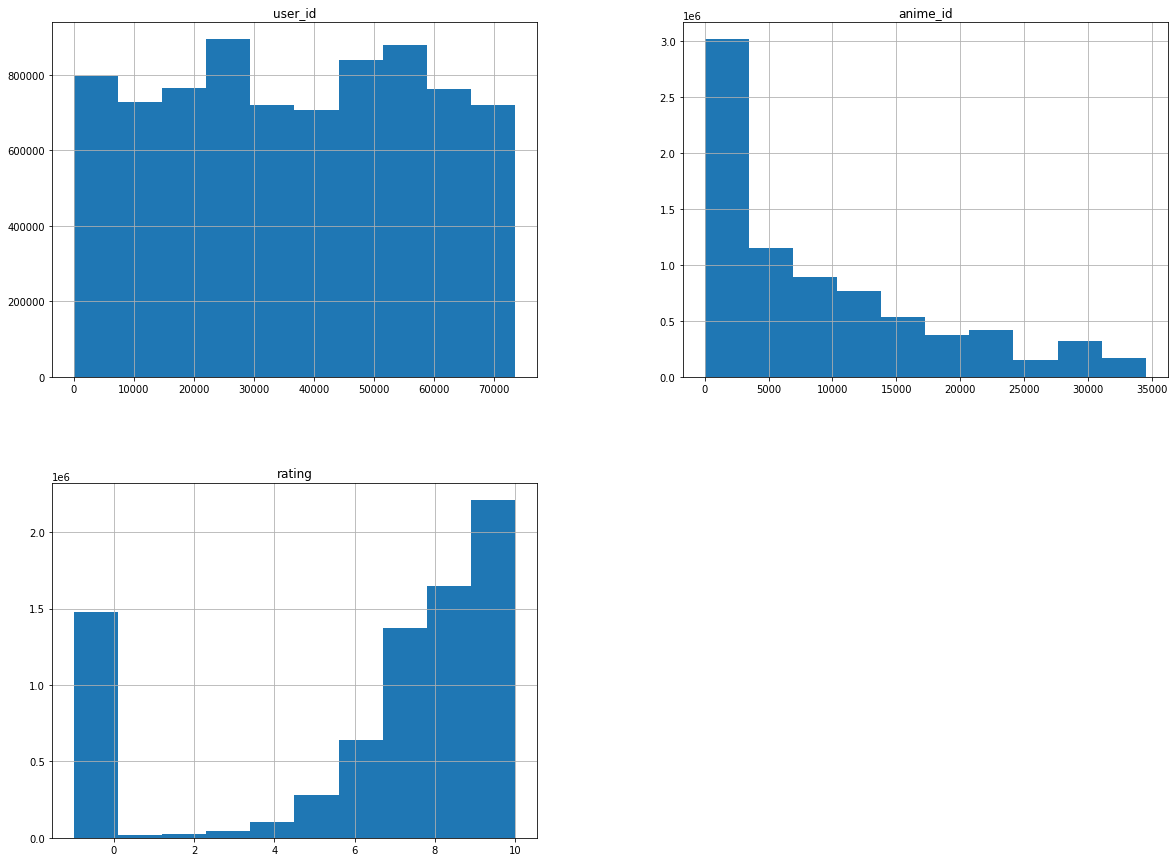

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
reviews.hist(bins = 10, figsize = (20,15))
plt.show()

In [8]:
reviews["user_id"].value_counts()

48766    10227
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
19358        1
36998        1
54086        1
61326        1
8650         1
Name: user_id, Length: 73515, dtype: int64

In [9]:
reviews = reviews.drop_duplicates(['user_id', 'anime_id'])
reviews.replace(-1,0,inplace = True)
review_matrix = reviews.pivot_table(index='anime_id', columns='user_id', values='rating',fill_value = 0)

In [10]:
review_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,9,0,10,0
5,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,8,0,10,0
6,0,0,0,0,8,0,0,0,0,0,...,9,0,0,0,0,0,0,0,10,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.neighbors import NearestNeighbors
number_neighbors = 5
knn = NearestNeighbors(metric = 'cosine',algorithm = 'auto')
knn.fit(review_matrix.values)
distances, indices = knn.kneighbors(review_matrix.values, n_neighbors = number_neighbors)

In [12]:
for i in range(10):
    similar_animes = indices[i].tolist()
    anime_distances = distances[i].tolist()
    anime_id = review_matrix.index[i]
    print('Similar Animes to',get_anime_name(anime_id)+':')
    similar_animes.pop(0)
    anime_distances.pop(0)
    
    j = 1
    for idx in similar_animes:
        print(j,': ',get_anime_name(review_matrix.index[idx]))
        j += 1
    print('\n')

Similar Animes to Cowboy Bebop:
1 :  Cowboy Bebop: Tengoku no Tobira
2 :  Samurai Champloo
3 :  Trigun
4 :  FLCL


Similar Animes to Cowboy Bebop: Tengoku no Tobira:
1 :  Cowboy Bebop
2 :  Ghost in the Shell
3 :  Akira
4 :  Trigun


Similar Animes to Trigun:
1 :  Cowboy Bebop
2 :  Trigun: Badlands Rumble
3 :  Samurai Champloo
4 :  FLCL


Similar Animes to Witch Hunter Robin:
1 :  Trinity Blood
2 :  Wolf&#039;s Rain
3 :  Last Exile
4 :  Ghost in the Shell: Stand Alone Complex


Similar Animes to Beet the Vandel Buster:
1 :  Beet the Vandel Buster Excellion
2 :  Onmyou Taisenki
3 :  Kiba
4 :  Rekka no Honoo


Similar Animes to Eyeshield 21:
1 :  Major S1
2 :  Major S2
3 :  Major S3
4 :  Hajime no Ippo


Similar Animes to Hachimitsu to Clover:
1 :  Hachimitsu to Clover II
2 :  Hachimitsu to Clover Specials
3 :  Nodame Cantabile
4 :  Nodame Cantabile: Paris-hen


Similar Animes to Hungry Heart: Wild Striker:
1 :  Whistle!
2 :  Dear Boys
3 :  Major S3
4 :  Major S4


Similar Animes to Initi

In [13]:
def recommend_anime(anime_id):
    anime_idx = review_matrix.index.tolist().index(anime_id)
    similar_animes = indices[anime_idx].tolist()
    anime_distances = distances[anime_idx].tolist()
    
    print('Similar Animes to', get_anime_name(anime_id)+':')
    #remove yourself
    if anime_idx in similar_animes:
        id_anime = similar_animes.index(anime_idx)
        similar_animes.pop(id_anime)
        anime_distances.pop(id_anime)
    else:
        similar_animes = similar_animes[:number_neighbors-1]
        anime_distances = anime_distances[:number_neighbors-1]
    
    j = 1
    for idx in similar_animes:
        print(j,': ',get_anime_name(review_matrix.index[idx]))
        j += 1
    print('\n')

In [14]:
recommend_anime(32281)

Similar Animes to Kimi no Na wa.:
1 :  Boku dake ga Inai Machi
2 :  Re:Zero kara Hajimeru Isekai Seikatsu
3 :  Shigatsu wa Kimi no Uso
4 :  ReLIFE




In [57]:
my_ratings["name"] = my_ratings.apply (lambda row: get_anime_name(row["anime_id"]), axis=1)
my_ratings_copy = my_ratings.copy()
my_ratings

,anime_id,rating,name
0,23847,10,Yahari Ore no Seishun Love Comedy wa Machigatt...
1,14813,10,Yahari Ore no Seishun Love Comedy wa Machigatt...
2,12403,10,Yuru Yuri♪♪
3,30902,10,Yuru Yuri Nachuyachumi!+
4,30279,10,Yuru Yuri San☆Hai!
5,10495,10,Yuru Yuri
6,5909,8,Seitokai no Ichizon
7,10464,8,Seitokai no Ichizon Lv.2
8,32603,8,Okusama ga Seitokaichou!+!
9,20847,10,Seitokai Yakuindomo*


In [58]:
def get_anime_rating(anime_id):
    rating = my_ratings_copy[my_ratings_copy["anime_id"] == anime_id]["rating"]
    return 0 if len(rating) == 0 or rating.values[0] == -1 else rating.values[0]

In [65]:
def original_set():
    return set(my_ratings["anime_id"].values)
original_set = original_set()
current_set = original_set
my_ratings_copy.at[0,"rating"] = 10
my_ratings_copy

,anime_id,rating,name
0,23847,10,Yahari Ore no Seishun Love Comedy wa Machigatt...
1,14813,10,Yahari Ore no Seishun Love Comedy wa Machigatt...
2,12403,10,Yuru Yuri♪♪
3,30902,10,Yuru Yuri Nachuyachumi!+
4,30279,10,Yuru Yuri San☆Hai!
5,10495,10,Yuru Yuri
6,5909,8,Seitokai no Ichizon
7,10464,8,Seitokai no Ichizon Lv.2
8,32603,8,Okusama ga Seitokaichou!+!
9,20847,10,Seitokai Yakuindomo*


In [66]:
def add_anime_iteration(review_matrix_list):
    for anime_idx, anime_id in review_matrix_list:
        if anime_id in original_set:
            continue #we don't wanna modify actual user's rating
        anime_idx = review_matrix.index.get_loc(anime_id)
        similar_animes = indices[anime_idx].tolist()
        anime_distances = distances[anime_idx].tolist()
        #remove yourself
        if anime_idx in similar_animes:
            id_anime = similar_animes.index(anime_idx)
            similar_animes.pop(id_anime)
            anime_distances.pop(id_anime)
        else:
            similar_animes = similar_animes[:number_neighbors-1]
            anime_distances = anime_distances[:number_neighbors-1]
        similar_anime_id = [review_matrix.index[i] for i in similar_animes]
        numerator = [anime_distances[i] * get_anime_rating(similar_anime_id[i]) for i in range(0,len(anime_distances))]
        denominator = [anime_distances[i] * (numerator[i] != 0) for i in range(0,len(numerator))]
        if sum(denominator) != 0:
            predicted_rating = sum(numerator)/sum(denominator)
            if anime_id not in current_set:
                my_ratings_copy.loc[len(my_ratings_copy.index)] = [anime_id, predicted_rating, get_anime_name(anime_id)]
                current_set.add(anime_id)
            else:
                my_ratings.at[anime_idx,"rating"] = predicted_rating
cnt = 1
length = len(current_set)
review_matrix_list = list(enumerate(review_matrix.index))
while len(current_set) < len(review_matrix):
    add_anime_iteration(review_matrix_list)
    if length == len(current_set):
        cnt += 1
    else:
        cnt = 1
    length = len(current_set)
    print(length)
    if cnt == 2:
        print("Try adding more of your own reviews")
        break

2331
3822
4483
4845
5165
5429
5703
6027
6313
6567
7062
7480
7603
7665
7703
7717
7719
7723
7726
7726
Try adding more of your own reviews


In [69]:
my_ratings_copy.sort_values(by="rating",ascending=False, inplace = True)
my_ratings_copy.nunique()

,anime_id,rating,name
4019,1140,10.0,Giniro no Kami no Agito
3994,1004,10.0,Kanojo to Kanojo no Neko
4131,2210,10.0,Tooi Sekai
3228,10389,10.0,Momo e no Tegami
3910,433,10.0,"Kumo no Mukou, Yakusoku no Basho"
...,...,...,...
304,6152,1.0,Final Fantasy VII: Advent Children - Venice Fi...
262,4981,1.0,Casshern Sins
263,4983,1.0,Hells
264,5037,1.0,Terra e... (TV) Specials


In [68]:
def get_top_n_animes(n = 20):
    cnt = 1
    i = 1
    while cnt <= n and i < len(my_ratings_copy) - 1:
        row = my_ratings_copy.loc[my_ratings_copy.index[i-1]]
        anime_id = row["anime_id"]
        if anime_id not in my_ratings.anime_id.values:
            print(str(cnt)+':',anime_id,row["name"], round(row["rating"]))
            cnt += 1
        i += 1
get_top_n_animes()

1: 1140 Giniro no Kami no Agito 10
2: 433 Kumo no Mukou, Yakusoku no Basho 10
3: 1004 Kanojo to Kanojo no Neko 10
4: 2210 Tooi Sekai 10
5: 10389 Momo e no Tegami 10
6: 13585 Natsuyuki Rendezvous 10
7: 13357 High School DxD Specials 10
8: 6280 Cat Shit One 10
9: 13403 Inu x Boku SS Special 10
10: 13429 Sakasama no Patema: Beginning of the Day 10
11: 3841 Chi&#039;s Sweet Home 10
12: 13267 Shinryaku!! Ika Musume 10
13: 3805 Kaitou Tenshi Twin Angel 10
14: 1926 Jishu Seisaku Movie Binchou-tan 10
15: 6610 Ibara no Ou 10
16: 3488 Genji Monogatari 10
17: 22839 Cross Road 10
18: 7044 Zan Sayonara Zetsubou Sensei Bangaichi 10
19: 23225 Yuru Yuri Nachuyachumi! 10
20: 6068 Sensei no Ojikan: Doki Doki School Hours OVA 10


In [70]:
OUTPUT_PATH = os.path.join("datasets","output")
OUTPUT_FILE = os.path.join(OUTPUT_PATH,"anime_prediction.csv")
my_ratings_copy.to_csv(OUTPUT_FILE,index = False, header = True)